In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

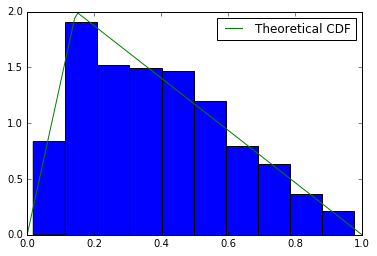

In [2]:
#код, генерирующий выборку обьема 1000 и ее гистаграмму и теор.график плотности
#я выбрал triang-распределение с параметром a = 0.146
a = 0.146
triang = sts.triang(a)
triang_rvs = triang.rvs(size=1000)
plt.hist(triang_rvs, normed=True)
x = np.linspace(0, 1, 100)
plt.plot(x, triang.pdf(x), label='Theoretical CDF')
plt.legend(loc='upper right')
plt.show()

In [3]:
#код, генерирующий 1000 выборок разных объемов
#чтобы оптимизировать код - определим функцию, которая строит гистограммы 
#на вход подается список из значений n(обьемов выборки), для которых мы хотим построить гистограмму
def make_hist_from_triang(n):
    triang_rvs_n = [np.array([triang.rvs(size=ni).mean() for i in xrange(1000)]) for ni in n]
    fig, ax = plt.subplots(len(n), sharex=True, sharey=True, figsize = (6, 10))
    fig.text(0.45, 0.08, 'mean values')
    fig.text(0.04, 0.55, 'number of samples', rotation='vertical')
    for i in range(len(n)):
        ax[i].hist(triang_rvs_n[i])

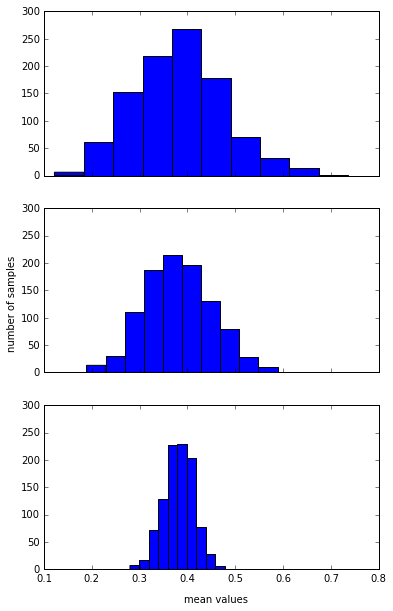

In [4]:
make_hist_from_triang([5, 10, 50])

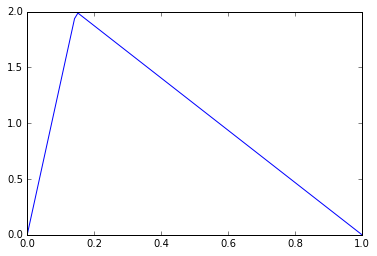

In [5]:
#теперь вычислим дисперсию и матожидание выбранного распределения
#сначала еще раз взглянем на график плотности, согласно вики матожидание на отрезке [a,b] равно (a+b+c)/3, дисперсия равна (a-b)^2/12
#a и b соответственно равны 0 и 1, c - значение максимума
plt.plot(x, triang.pdf(x))

In [6]:
#найдем с
Fc = triang.pdf(x).max() #значение максимума
c_idx = np.where(triang.pdf(x)==Fc)[0][0] #индекс элемента соответствующего максимуму
c = x[c_idx] 

In [7]:
#теперь вычислим дисперсию и матожидание
Ex = (0+1+c)/3
Dx = ((1-0)**2)/12.

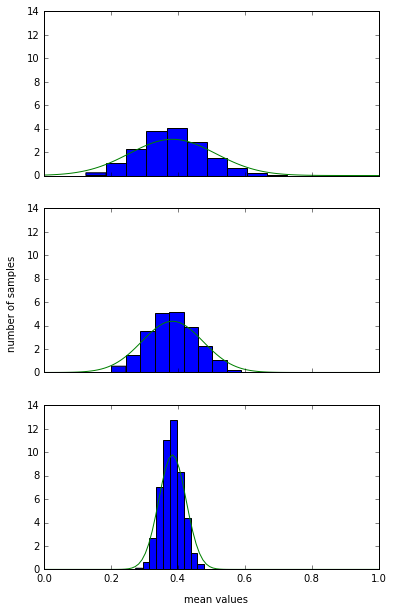

In [8]:
#теперь построим график нормального распределения поверх гистограмм, дополнив предыдущую функцию норм. распределением
def make_hist_from_triang_norm(n):
    triang_rvs_n = [np.array([triang.rvs(size=ni).mean() for i in xrange(1000)]) for ni in n]
    fig, ax = plt.subplots(len(n), sharex=True, sharey=True, figsize = (6, 10))
    fig.text(0.45, 0.08, 'mean values')
    fig.text(0.04, 0.55, 'number of samples', rotation='vertical')
    for i in range(len(n)):
        norm = sts.norm(Ex, np.sqrt(Dx/n[i])) #добавляю нормальное распределение
        ax[i].hist(triang_rvs_n[i], normed=True)
        ax[i].plot(x, norm.pdf(x)) #и его график

make_hist_from_triang_norm([5, 10, 50])

In [9]:
#как можно заметить, с ростом параметра n точность аппроксимации становится все лучше